In [4]:
import numpy as np
import xarray as xr
import datetime
import os
try:
    os.chdir(os.path.join(os.getcwd(),'bathymetry_checks') )# 
    print(os.getcwd())
except:
    pass

import sys
sys.path.append('../')
from postprocessing import tideanalysis

In [2]:
datafolder='CHSdata'
tstafile='CHSTG.xyn'  #file of all the TG stations in the regional model domain.
tstaposdata=np.loadtxt(tstafile,usecols=(0,1),dtype='float')
tstanamdata=np.loadtxt(tstafile,usecols=(2),dtype='str',delimiter='\t')

In [3]:
# tidtimconst=coef['aux']['frq']
# corrconslis=coef['name']

import xarray as xr
# ds=xr.Dataset({'tidalconstlist':corrconslis,'constfreq':1./tidtimconst})
# ds.to_netcdf("Tidalconstdict.nc")
ds=xr.open_dataset('Tidalconstdict.nc')
tidtimconst=1./(np.array(ds['constfreq'])*3600)  #getting freq in hz. 
corrconslis=list(np.array(ds['tidalconstlist']))

Below towards the end of this notebook you will find analysis to determine the significant tidal constituents! 

In [9]:
#annual
j=0
tideconst='M2'
M2am=[];M2ph=[]
data={}
for station in tstanamdata:
    staname=station[1:-1]
    print(staname)
    a=np.array([i[:-3] for i in os.listdir(datafolder)],dtype='str')
    i=np.where(a==staname)
    print(i)
    stafile=os.path.join(datafolder,os.listdir(datafolder)[i[0][0]])
    stawldata=np.loadtxt(stafile,usecols=(1),dtype='float',skiprows=2)
    statimdata=np.loadtxt(stafile,usecols=(0),dtype='str',skiprows=2)
    stattimtrdata=[datetime.datetime.strptime(i,"%Y-%m-%dT%H:%M:%SZ") for i in statimdata]
    data['time']=stattimtrdata
    data['h']=stawldata
    data['lon']=[tstaposdata[j,0]]
    data['lat']=[tstaposdata[j,1]]
    (Am,Ph)= tideanalysis.compute1stationtidal(data,tideconst)
    M2am=np.append(M2am,Am)
    M2ph=np.append(M2ph,Ph)
    j+=1
    

Sachs Harbour
(array([455]),)
solve: matrix prep ... solution ... done.
Pearce Point
(array([362]),)
solve: matrix prep ... solution ... done.
Cape Parry
(array([271]),)
solve: matrix prep ... solution ... done.
Kugluktuk
(array([779]),)
solve: matrix prep ... solution ... done.
Winter Harbour
(array([499]),)
solve: matrix prep ... solution ... done.
Tysoe Point
(array([689]),)
solve: matrix prep ... solution ... done.
Paulatuk
(array([772]),)
solve: matrix prep ... solution ... done.
Bernard Harbour
(array([431]),)
solve: matrix prep ... solution ... done.
Franklin Bay
(array([24]),)
solve: matrix prep ... solution ... done.
Peel Point
(array([154]),)
solve: matrix prep ... solution ... done.
Baillie Is. (South Spit)
(array([470]),)
solve: matrix prep ... solution ... done.
Austin Bay
(array([239]),)
solve: matrix prep ... solution ... done.
Tuktoyaktuk
(array([328]),)
solve: matrix prep ... solution ... done.
Natkusiak Peninsula
(array([185]),)
solve: matrix prep ... solution ... don

KeyboardInterrupt: 

In [ ]:
selectstation={'M2amp':(("stations"),M2am),'M2ph':(("stations"),M2ph),'stationname':tstanamdata,'Lon':tstaposdata[:,0],'Lat':tstaposdata[:,1]}
coords={"stations": np.linspace(1,len(tstanamdata),len(tstanamdata))}
ds=xr.Dataset(selectstation,coords=coords)
ds.to_netcdf('TGCHS_RC_M2_newextended.nc')

In [ ]:
m2data=xr.open_dataset('TGCHS_RC_M2_newextended.nc')
m2data.info()

xarray.Dataset {
dimensions:
	Lat = 156 ;
	Lon = 156 ;
	stationname = 156 ;
	stations = 156 ;

variables:
	float64 M2amp(stations) ;
	float64 M2ph(stations) ;
	object stationname(stationname) ;
	float64 Lon(Lon) ;
	float64 Lat(Lat) ;
	float64 stations(stations) ;

// global attributes:
}

Monthly-march septh etc. this is not correct! We should reconstruct based on the m2 h1 and h2 and then compute march and sept separately.! 

In [ ]:
#march
# sdate='2020-03-01T00:00:00Z'  # sdate of all data
# edate='2020-04-01T00:00:00Z'  # end date of all data.
#sept
sdate='2020-09-01T00:00:00Z'  # sdate of all data
edate='2020-10-01T00:00:00Z' 
tf64=np.datetime64(datetime.datetime.strptime(sdate,"%Y-%m-%dT%H:%M:%SZ"))
te64=np.datetime64(datetime.datetime.strptime(edate,"%Y-%m-%dT%H:%M:%SZ"))


In [ ]:
j=0
tideconst='M2'
M2am=[];M2ph=[]
data={}
for station in tstanamdata:
    staname=station[1:-1]
    print(staname)
    a=np.array([i[:-3] for i in os.listdir(datafolder)],dtype='str')
    i=np.where(a==staname)
    print(i)
    stafile=os.path.join(datafolder,os.listdir(datafolder)[i[0][0]])
    stawldata=np.loadtxt(stafile,usecols=(1),dtype='float',skiprows=2)
    statimdata=np.loadtxt(stafile,usecols=(0),dtype='str',skiprows=2)
    stattimtrdata=[datetime.datetime.strptime(i,"%Y-%m-%dT%H:%M:%SZ") for i in statimdata]
    s=np.where(stattimtrdata==tf64)[0][0]
    e=np.where(stattimtrdata==te64)[0][0]
    data['time']=stattimtrdata[s:e]
    data['h']=stawldata[s:e]
    data['lon']=[tstaposdata[j,0]]
    data['lat']=[tstaposdata[j,1]]
    (Am,Ph)= tideanalysis.compute1stationtidal(data,tideconst)
    M2am=np.append(M2am,Am)
    M2ph=np.append(M2ph,Ph)
    j+=1

Sachs Harbour
(array([455]),)
solve: matrix prep ... solution ... done.
Pearce Point
(array([362]),)
solve: matrix prep ... solution ... done.
Cape Parry
(array([271]),)
solve: matrix prep ... solution ... done.
Kugluktuk
(array([779]),)
solve: matrix prep ... solution ... done.
Winter Harbour
(array([499]),)
solve: matrix prep ... solution ... done.
Tysoe Point
(array([689]),)
solve: matrix prep ... solution ... done.
Paulatuk
(array([772]),)
solve: matrix prep ... solution ... done.
Bernard Harbour
(array([431]),)
solve: matrix prep ... solution ... done.
Franklin Bay
(array([24]),)
solve: matrix prep ... solution ... done.
Peel Point
(array([154]),)
solve: matrix prep ... solution ... done.
Baillie Is. (South Spit)
(array([470]),)
solve: matrix prep ... solution ... done.
Austin Bay
(array([239]),)
solve: matrix prep ... solution ... done.
Tuktoyaktuk
(array([328]),)
solve: matrix prep ... solution ... done.
Natkusiak Peninsula
(array([185]),)
solve: matrix prep ... solution ... don

In [ ]:
selectstation={'M2amp':(("stations"),M2am),'M2ph':(("stations"),M2ph),'stationname':tstanamdata,'Lon':tstaposdata[:,0],'Lat':tstaposdata[:,1]}
coords={"stations": np.linspace(1,len(tstanamdata),len(tstanamdata))}
ds=xr.Dataset(selectstation,coords=coords)
ds.to_netcdf('TGCHS_M2_Sep2020.nc')

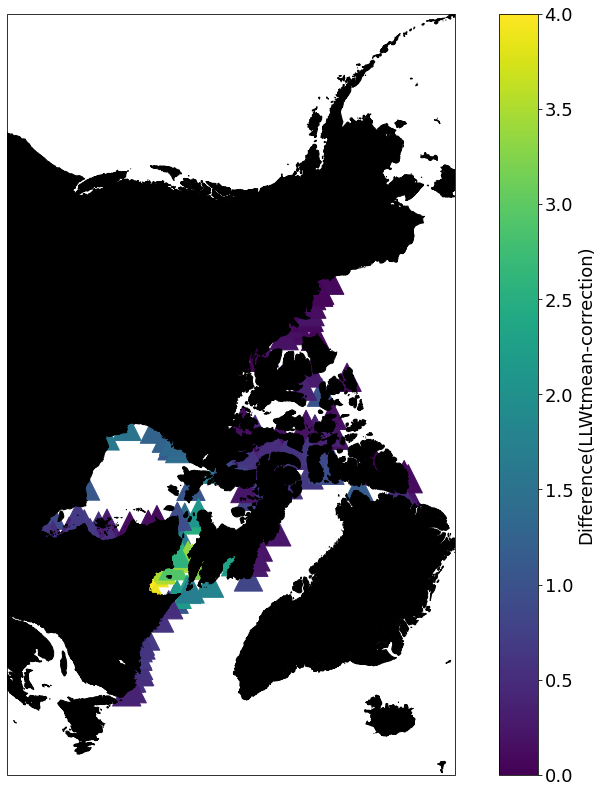

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf 
   
# marking the x-axis and y-axis 

fig=plt.figure(figsize=(20, 14), frameon=True)
proj=ccrs.NorthPolarStereo(central_longitude=0.0,true_scale_latitude=None, globe=None)
ax1=fig.add_subplot(1,1,1,projection=proj) 
ax1.set_extent((-158, -47, 49, 84), crs=ccrs.PlateCarree())
# ax.set_extent([-180,180,45,90]) 
cbarlabel='Difference(LLWtmean-correction)' 
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='black',alpha=1)
ax1.add_feature(feature)
# contour_opts = {'levels': np.linspace(0,8,50),
#                 'cmap':'viridis','transform':ccrs.PlateCarree(),'alpha':1}
# cont=ax1.tricontour(triang,scorrval,**contour_opts)
# fig.colorbar(cont)
cont1=ax1.scatter(m2data.Lon,m2data.Lat,c=m2data.M2amp,transform=ccrs.PlateCarree(),cmap='viridis',marker='^',s=800,vmin=0,vmax=4.0)
cbar=fig.colorbar(cont1,fraction=0.078, pad=0.04)
cbar.set_label(cbarlabel, rotation=90, fontsize=18)
cbar.ax.tick_params(labelsize=18)
plt.show()

Testing for tidal constitutents based on the noise ratio (signal to noise)

Lets start with year analysis first!

In [5]:
import utide
from matplotlib.dates import date2num

In [6]:
#list from fermijn
constlist=['SA','SSA','MSM','MM','MSF','MF', \
    'ALP1','2Q1','SIG1','Q1','RHO1','O1','TAU1','BET1','NO1','CHI1','PI1','P1', \
    'S1','K1','PSI1','PHI1','THE1','J1','SO1','OO1','UPS1', \
    '2NS2','ST37','OQ2','EPS2','ST2','2N2','MU2','N2','NU2','OP2','H1','M2','H2','MKS2','LDA2', \
    'L2','T2','S2','R2','K2','MSN2','ETA2','2SM2','SKM2', \
    'NO3','MO3','M3','SO3','MK3','SK3', \
    'ST8','N4','3MS4','MN4','ST9','ST40','M4','ST10','SN4','KN4','MS4','MK4','SL4','S4','SK4', \
    'MNO5','2MO5','MNK5','2MP5','2MK5','MSK5','2SK5', \
    'ST11','2NM6','ST12','2MN6','ST13','ST41','M6','MSN6','MKN6','2MS6','2MK6','NSK6','2SM6','MSK6', \
    'ST16','3MK7', \
    'ST18','3MN8','ST19','M8','ST20','ST21','3MS8','3MK8','ST22','ST23','ST24', \
    'ST26','4MK9','ST27', \
    'ST28','M10','ST29','ST30','ST31','ST32', \
    'M12','ST34','ST35']


In [ ]:
#annual
j=0
tideconst='M2'
# M2am=[];M2ph=[]
data={}
conststatdict={}
for station in tstanamdata[:1]:
# station=tstanamdata[0]
    staname=station[1:-1]
    print(staname)
    a=np.array([i[:-3] for i in os.listdir(datafolder)],dtype='str')
    i=np.where(a==staname)
    print(i)
    stafile=os.path.join(datafolder,os.listdir(datafolder)[i[0][0]])
    stawldata=np.loadtxt(stafile,usecols=(1),dtype='float',skiprows=2)
    statimdata=np.loadtxt(stafile,usecols=(0),dtype='str',skiprows=2)
    stattimtrdata=[datetime.datetime.strptime(i,"%Y-%m-%dT%H:%M:%SZ") for i in statimdata]

    data['time']=stattimtrdata
    data['h']=stawldata
    data['lon']=[tstaposdata[j,0]]
    data['lat']=[tstaposdata[j,1]]
    # const=['K1','O1','Q1','P1','N2','M2','S2','K2']
    epoch1='1970-01-01'
    tidalconst=tideconst
    time=data['time']
    timedatnum=np.array((date2num(time))).flatten()
    Stationlon=data['lon'];Stationlat=data['lat']
    sshi=np.array((data['h']))
    coef = utide.solve(timedatnum,sshi,lat=Stationlat[0],
                        epoch=epoch1,
                        constit=constlist,
                        conf_int='linear',
                        white=True,
                        method='ols')
    # SNRvec=coef['SNR']
    # i=0
    # constimp=[]
    # for SNR in SNRvec:

    #     if SNR>1.5:
    #         # print('Constit'+coef['name'][i]+'is imp.')
    #         constimp=np.append(constimp,coef['name'][i])
    #     i+=1
    # print(len(constimp))
    # conststatdict[staname]=constimp

Sachs Harbour
(array([455]),)
solve: matrix prep ... solution ... done.


Turns out SNR and rayleigh is beter for obs but this is tidal predictions which is probably based on less constituents. the Ft approach is better.

In [7]:

import matplotlib.pyplot as plt
import scipy

In [8]:
def FFTstation(sshi,timedatnum):
    meansshi=np.mean(sshi)
    mred=sshi-meansshi
    # hann = np.hanning(len(sshi))
    sshft=scipy.fft.fft(mred)
    # plt.plot(sshft[:])
    # this shows that the first element is not correct ( don't understand why) but now i do. We should remove the mean beacuse of LLWLT ref.
    sshftN=sshft[:]
    N=int(len(sshftN)/2)+1
    #plotting abs of amplitude with half the series.
    Ampvec=2*np.abs(sshftN[:N])/N  #multipy by 2/N
    # Ampvec=2*Ampvec  #correction factor for hanning/
    dt=int((timedatnum[1]-timedatnum[0])*3600.*24.)
    freq=1./dt
    # print('dt=%.5fs (Sample Time)' % dt)
    # print('freq=%.4fHz (Frequency)' % freq)
    frevec=np.linspace(0, freq/2, N, endpoint=True)
    timvec=(1/frevec)/3600.
    return(Ampvec,timvec)

#tideconst index in timvec we compare the different frequency bins where the freq lies. 
# say f1 and f2 are two frequencies (in time domain) in which a tidal freq say Tf lies. 
# then Tf=f1 if f1+(f2-f1)/2 >Tf then Tf=f1 
def selindex(corrconslis,tidtimconst,timvec):
    tidconstindextvec={}
    index=[]
    constvec=[]
    for i in range(len(corrconslis[:])):
        const=corrconslis[i]
        # constperiod=1/tidtimconst[i]
        constfreq=tidtimconst[i]
        # print(constperiod)
        # print(timvec)
        eind=np.where(timvec>constfreq)[0]
        if eind.size==0:
            print('Ignoring const '+const+' as it larger than possible len of time series')
            continue
        else:
            eind=eind[0]
        # print(eind)
        sind=eind-1
        df=timvec[eind]-timvec[sind]
        if constfreq>timvec[sind]+df/2:
            index=np.append(index,eind)
            constvec=np.append(constvec,const)
        else:
            index=np.append(index,sind)
            constvec=np.append(constvec,const)

    tidconstindextvec={'constname':constvec,'tvecindex':index}
    return(tidconstindextvec)


Turns out the yearly analysis gave less significant constituents than monthly. That was because monthly had low resolution and thus, more constituents fell in one frequency bin. Furthermore, monthly showed h1 and h2 and other constituents which is incorrect. So we need to check the rayleigh criterion (or rayleigh frequency) This frequency is the lowest resolvable frequency for our time series. given by $f_r= 1/(N dt)$ where $dt$ is 15min in this case! While nyquist frequency is the highest resolvable frequency $f_n=1/(2 dt)$. Let us start with our tide gauge sample with 15mins dt and N as one year and one month. the month we consider as sept because it is the shorter one than march. Ratio of nyquist to rayleigh tells you how many different freq you can resolve. $f_n/f_r=N/2$. 

Below we get the set of 118 constituents with their hourly time periods! 

In [12]:
# tidtimconst=coef['aux']['frq']
# corrconslis=coef['name']

import xarray as xr
# ds=xr.Dataset({'tidalconstlist':corrconslis,'constfreq':1./tidtimconst})
# ds.to_netcdf("Tidalconstdict.nc")
ds=xr.open_dataset('Tidalconstdict.nc')
tidtimconst=1./(np.array(ds['constfreq'])*3600)  #getting freq in hz. 
corrconslis=np.array(ds['tidalconstlist'])

In [16]:
dt=15*60.
N_y=4*24*366
N_m=4*24*30
Rfy=1./(N_y*dt) #hz
Rfm=1./(N_m*dt) #hz
Nyy=1/(2*dt)  #hz it is same for yearly and monthly. 

Now we check for nyquist and rayleigh freq and define which are possible for yearly and monthly. Nyquist test gave the same set of 118 components

In [14]:
#comparing two freq for rayleigh.
def compfreqray(f1,f2,Rf):
    #i is the counter for if the freq resolvable or not. 
    #f1 is larger than f2
    if f1>f2:
        df=f1-f2
    else:
        df=f2-f1
    if df>Rf:
        i=1
        # print('Frequencies: '+str(3600/f1)+' and '+str(3600/f2)+' are resolvable.')
    else:
        i=0
    return(i)
def selfreqRayleigh(corrconslis,tidtimconst,const,constfreq,Rf):
    resconstlist=[]
    resfreqlist=[]
    resconstlist=const
    resfreqlist=constfreq
    #check rayleigh
    k=0
    for const2 in corrconslis:
        constfreq2=tidtimconst[k]
        i=compfreqray(constfreq,constfreq2,Rf)
        if i==1:
            resconstlist=np.append(resconstlist,const2)
            resfreqlist=np.append(resfreqlist,constfreq2)

        k+=1
    return(resconstlist,resfreqlist)


In [ ]:
j=0
resoconsdictm={}
majorconst=['M2','S2','N2','K1','O1','Q1']
majorfreq=[0.0000223643,0.0000231481,0.0000219442,0.0000116058,0.0000107585,0.0000103385]
for const in majorconst:
    constfreq=majorfreq[j]
    if const=='M2':
        (resconstlist,resfreqlist)=selfreqRayleigh(corrconslis,tidtimconst,const,constfreq,Rfm)
    else:
        (resconstlist,resfreqlist)=selfreqRayleigh(resconstlist,resfreqlist,const,constfreq,Rfm)
    # resoconsdictm[const]=resconstlist
    # resoconsdictm[constfreq]=resfreqlist
    # print(len(resconstlist)==len(resfreqlist))
    j+=1

In [ ]:
monthRfconstlist=resconstlist
monthRffreqlist=resfreqlist
#removing SA and SSA type amplitude
monthRfconstlist=np.delete(resconstlist,np.where(resfreqlist<Rfm))
monthRffreqlist=np.delete(resfreqlist,np.where(resfreqlist<Rfm))

#yearly there is no issue of rayleigh freq in all 118.  so yearly is 118 
#but monthly the issue is that very less frequencies.

Now we compute the Fourier Transform for monthly and yearly and do tidal analysis for the same! and then compare the two! 
We start by computing the FT amplitudes and Tidal analysis amplitudes for a station and plotting the scatter plot for the significant amplitudes. (yearly)

In [9]:
station=tstanamdata[0]
typ='year'
j=0
staname=station[1:-1]
print(staname)
data={}
a=np.array([i[:-3] for i in os.listdir(datafolder)],dtype='str')
i=np.where(a==staname)
# print(i)
stafile=os.path.join(datafolder,os.listdir(datafolder)[i[0][0]])
stawldata=np.loadtxt(stafile,usecols=(1),dtype='float',skiprows=2)
statimdata=np.loadtxt(stafile,usecols=(0),dtype='str',skiprows=2)
stattimtrdata=[datetime.datetime.strptime(i,"%Y-%m-%dT%H:%M:%SZ") for i in statimdata]
if typ=='month':
    s=np.where(stattimtrdata==tf64)[0][0]
    e=np.where(stattimtrdata==te64)[0][0]
    data['time']=stattimtrdata[s:e]
    data['h']=stawldata[s:e]
else: 
    data['time']=stattimtrdata
    data['h']=stawldata
data['lon']=[tstaposdata[j,0]]
data['lat']=[tstaposdata[j,1]]
time=data['time']
timedatnum=np.array((date2num(time))).flatten()
Stationlon=data['lon'];Stationlat=data['lat']
sshi=np.array((data['h']))

Sachs Harbour


In [60]:
#gettings utide solution
epoch1='1970-01-01'
coef = utide.solve(timedatnum,sshi,lat=Stationlat[0],
                        epoch=epoch1,
                        constit=list(corrconslis),
                        conf_int='linear',
                        white=True,
                        method='ols',
                        nodal=False)
AmpTA=coef['A']
# print(coef)

solve: matrix prep ... solution ... done.


In [68]:
print(AmpTA[87])
print(Stationlat[0])

2.072605270200449e-06
69.35


In [15]:
#getting FT solution
(Ampvec,timvec)=FFTstation(sshi,timedatnum)
fvec=1/(timvec*3600)
(tidconstindextvec)=selindex(corrconslis,tidtimconst,fvec)
AmpvecFT=[]
for i in range(len(tidconstindextvec['constname'])):
    const=tidconstindextvec['constname'][i]
    index=int(tidconstindextvec['tvecindex'][i])
    ampconst=Ampvec[index]
    AmpvecFT=np.append(AmpvecFT,ampconst)

<ipython-input-7-5909211ae82d>:16: RuntimeWarning: divide by zero encountered in true_divide
  timvec=(1/frevec)/3600.


(array([  4,   7,  12,  17,  24,  26,  28,  33,  35,  37,  38,  41,  45,
        46,  47,  48,  50,  54,  55,  56,  60,  61,  62,  63,  65,  67,
        68,  70,  71,  72,  73,  74,  75,  78,  79,  80,  81,  84,  85,
        86,  87,  88,  89,  91,  92,  93,  94,  95,  96,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117]),)


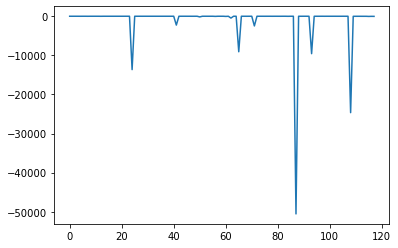

In [ ]:
reldiff=(AmpTA-AmpvecFT)/AmpTA
plt.plot(reldiff)
largdiff=np.where(np.abs(reldiff)>1)
largdiffconst=corrconslis[largdiff]
print(largdiff)

Text(0.5, 1.0, 'Points with rel diff larger than 1  are marked.')

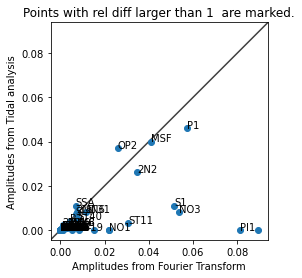

In [ ]:
fig, ax = plt.subplots()
ax.scatter(AmpvecFT,AmpTA)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('Amplitudes from Fourier Transform')
ax.set_ylabel('Amplitudes from Tidal analysis')
for i, txt in enumerate(largdiffconst):
    ax.annotate(txt, (AmpvecFT[i], AmpTA[i]))

ax.set_title('Points with rel diff larger than 1  are marked.')

We use a similar logic from above to obtain M2, H1 and H2 amplitudes for all the tide gauges! . 

In [9]:
tidvec=['M2','H1','H2']
frevec=[0.0000223643,0.0000223326,0.000022396]
tiddict1={}
j=0
for station in tstanamdata[:]:
    # station=tstanamdata[0]
    typ='year'

    staname=station[1:-1]
    print(staname)
    data={}
    a=np.array([i[:-3] for i in os.listdir(datafolder)],dtype='str')
    i=np.where(a==staname)
    # print(i)
    stafile=os.path.join(datafolder,os.listdir(datafolder)[i[0][0]])
    stawldata=np.loadtxt(stafile,usecols=(1),dtype='float',skiprows=2)
    statimdata=np.loadtxt(stafile,usecols=(0),dtype='str',skiprows=2)
    stattimtrdata=[datetime.datetime.strptime(i,"%Y-%m-%dT%H:%M:%SZ") for i in statimdata]
    if typ=='month':
        s=np.where(stattimtrdata==tf64)[0][0]
        e=np.where(stattimtrdata==te64)[0][0]
        data['time']=stattimtrdata[s:e]
        data['h']=stawldata[s:e]
    else: 
        data['time']=stattimtrdata
        data['h']=stawldata
    data['lon']=[tstaposdata[j,0]]
    data['lat']=[tstaposdata[j,1]]
    time=data['time']
    timedatnum=np.array((date2num(time))).flatten()
    Stationlon=data['lon'];Stationlat=data['lat']
    sshi=np.array((data['h']))
    #gettings utide solution
    epoch1='1970-01-01'
    coef = utide.solve(timedatnum,sshi,lat=Stationlat[0],
                            epoch=epoch1,
                            constit=list(corrconslis),
                            conf_int='linear',
                            white=True,
                            method='ols')
    Ampta=coef['A']
    name=coef['name']
    AmpTAvec=[]
    for tidconst in name:
        k=np.where(name==tidconst)
        # print(j)
        if tidconst=='M2' or tidconst=='H1' or tidconst=='H2':
            amp=Ampta[k]
            AmpTAvec=np.append(AmpTAvec,amp)
    #getting FT solution
    (Ampvec,timvec)=FFTstation(sshi,timedatnum)
    fvec=1/(timvec*3600)
    (tidconstindextvec)=selindex(tidvec,frevec,fvec)
    AmpvecFT=[]
    print(tidconstindextvec)
    for i in range(len(tidconstindextvec['constname'])):
        const=tidconstindextvec['constname'][i]
        index=int(tidconstindextvec['tvecindex'][i])
        ampconst=Ampvec[index]
        AmpvecFT=np.append(AmpvecFT,ampconst)
    tiddict1[station]={'TA':np.array(AmpTAvec),'FT':AmpvecFT}
    j+=1


Sachs Harbour
solve: matrix prep ... solution ... done.
{'constname': array(['M2', 'H1', 'H2'], dtype='<U32'), 'tvecindex': array([707., 706., 708.])}
Pearce Point


<ipython-input-8-c4027b7a2203>:18: RuntimeWarning: divide by zero encountered in true_divide
  timvec=(1/frevec)/3600.


solve: matrix prep ... solution ... done.
{'constname': array(['M2', 'H1', 'H2'], dtype='<U32'), 'tvecindex': array([707., 706., 708.])}
Cape Parry
solve: matrix prep ... solution ... done.
{'constname': array(['M2', 'H1', 'H2'], dtype='<U32'), 'tvecindex': array([707., 706., 708.])}
Kugluktuk
solve: matrix prep ... solution ... done.
{'constname': array(['M2', 'H1', 'H2'], dtype='<U32'), 'tvecindex': array([707., 706., 708.])}
Winter Harbour
solve: matrix prep ... solution ... done.
{'constname': array(['M2', 'H1', 'H2'], dtype='<U32'), 'tvecindex': array([707., 706., 708.])}
Tysoe Point
solve: matrix prep ... solution ... done.
{'constname': array(['M2', 'H1', 'H2'], dtype='<U32'), 'tvecindex': array([707., 706., 708.])}
Paulatuk
solve: matrix prep ... solution ... done.
{'constname': array(['M2', 'H1', 'H2'], dtype='<U32'), 'tvecindex': array([707., 706., 708.])}
Bernard Harbour
solve: matrix prep ... solution ... done.
{'constname': array(['M2', 'H1', 'H2'], dtype='<U32'), 'tvecind

In [48]:
print(Ampvec[706:709])
print(fvec[706:709])
print(frevec)

[0.3185187  0.21601534 0.01647368]
[2.23272171e-05 2.23588420e-05 2.23904670e-05]
[2.23643e-05, 2.23326e-05, 2.2396e-05]


In [10]:
#get M2, H1 and H2 for each station
M2ampvecTA=[];H1ampvecTA=[];H2ampvecTA=[]
M2ampvecFT=[];H1ampvecFT=[];H2ampvecFT=[]
for station in tstanamdata:
    #M2ampvec
    M2ampvecTA=np.append(M2ampvecTA,tiddict1[station]['TA'][0])
    M2ampvecFT=np.append(M2ampvecFT,tiddict1[station]['FT'][0])
    #H1ampvec
    H1ampvecTA=np.append(H1ampvecTA,tiddict1[station]['TA'][1])
    H1ampvecFT=np.append(H1ampvecFT,tiddict1[station]['FT'][1])
    #H2ampvec
    H2ampvecTA=np.append(H2ampvecTA,tiddict1[station]['TA'][2])
    H2ampvecFT=np.append(H2ampvecFT,tiddict1[station]['FT'][2])    

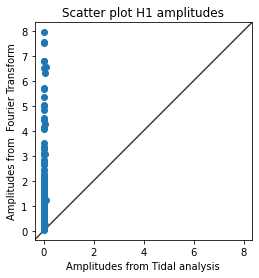

In [13]:
fig, ax = plt.subplots()
ax.scatter(H1ampvecTA,H1ampvecFT)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel('Amplitudes from Tidal analysis')
ax.set_ylabel('Amplitudes from  Fourier Transform')
# for i, txt in enumerate(largdiffconst):
#     ax.annotate(txt, (AmpvecFT[i], AmpTA[i]))

ax.set_title('Scatter plot H1 amplitudes')
plt.savefig('H1amp_scatter.jpg')


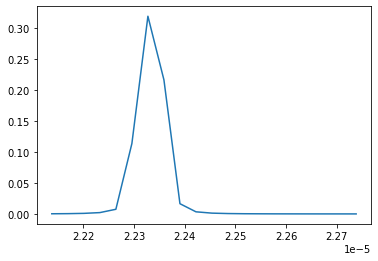

In [71]:
plt.plot(fvec[700:720],Ampvec[700:720])
plt.vlines()



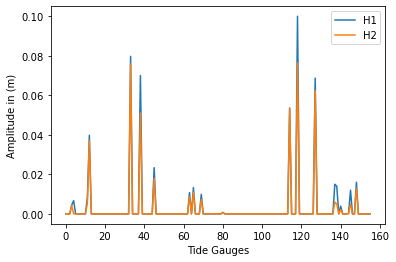

In [11]:

plt.plot(H1ampvecTA,label='H1')
plt.plot(H2ampvecTA,label='H2')
plt.xlabel('Tide Gauges')
plt.ylabel('Amplitude in (m)')
plt.legend()

Getting the points with H1 andH2 elements.

(array([  3,   4,  11,  12,  33,  38,  45,  63,  65,  69, 114, 118, 127,
       137, 138, 140, 145, 148]),)
(array([  3,  11,  12,  33,  38,  45,  63,  65,  69, 114, 118, 127, 137,
       138, 140, 145, 148]),)
4.121902650306443e-05
1.0002382798194176
0.006718288196979793


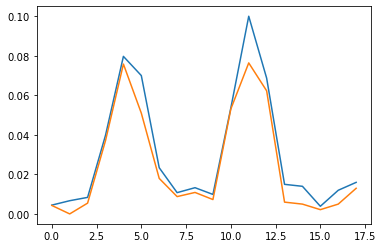

In [22]:
indexh1=np.where(H1ampvecTA>1e-3)
print(indexh1)
plt.plot(H1ampvecTA[indexh1])
indexh2=np.where(H2ampvecTA>1e-3)
print(indexh2)
plt.plot(H2ampvecTA[indexh1])


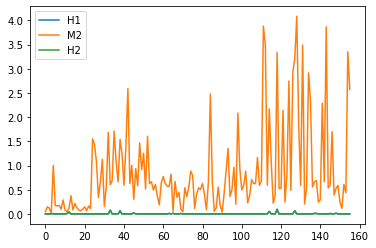

In [16]:
plt.plot(H1ampvecTA,label='H1')
plt.plot(M2ampvecTA,label='M2')
plt.plot(H2ampvecTA,label='H2')
plt.legend()
plt.savefig('M2H1H2_TA.jpg')

In [ ]:
def createtconstbstations(tstanamdata,tstaposdata,datafolder,typ,tidtimconst,corrconslis):
    j=0
    # M2am=[];M2ph=[]
    data={}
    conststatdict={}
    for station in tstanamdata:
    # station=tstanamdata[0]
        staname=station[1:-1]
        print(staname)
        a=np.array([i[:-3] for i in os.listdir(datafolder)],dtype='str')
        i=np.where(a==staname)
        # print(i)
        stafile=os.path.join(datafolder,os.listdir(datafolder)[i[0][0]])
        stawldata=np.loadtxt(stafile,usecols=(1),dtype='float',skiprows=2)
        statimdata=np.loadtxt(stafile,usecols=(0),dtype='str',skiprows=2)
        stattimtrdata=[datetime.datetime.strptime(i,"%Y-%m-%dT%H:%M:%SZ") for i in statimdata]
        if typ=='month':
            s=np.where(stattimtrdata==tf64)[0][0]
            e=np.where(stattimtrdata==te64)[0][0]
            data['time']=stattimtrdata[s:e]
            data['h']=stawldata[s:e]
        else: 
            data['time']=stattimtrdata
            data['h']=stawldata
        data['lon']=[tstaposdata[j,0]]
        data['lat']=[tstaposdata[j,1]]
        time=data['time']
        timedatnum=np.array((date2num(time))).flatten()
        Stationlon=data['lon'];Stationlat=data['lat']
        sshi=np.array((data['h']))
        (Ampvec,timvec)=FFTstation(sshi,timedatnum)
        (tidconstindextvec)=selindex(corrconslis,tidtimconst,timvec)
        constimp=[]
        for i in range(len(tidconstindextvec['constname'])):
            const=tidconstindextvec['constname'][i]
            index=int(tidconstindextvec['tvecindex'][i])
            ampconst=Ampvec[index]
            if ampconst>0.01:
                constimp=np.append(constimp,const)
            
        conststatdict[staname]=constimp
    return(conststatdict)

def cumulateimpconst(conststatdict,tstanamdata):
    constflist=[]
    sta1=conststatdict['Sachs Harbour']
    constflist=sta1

    for station in tstanamdata[1:]:
        staname=station[1:-1]
        sta2=conststatdict[staname]

        for i in range(len(sta2)):
            commonsta=np.where(constflist==sta2[i])
            # print(commonsta[0].size)       
            if commonsta[0].size==0:
                constflist=np.append(constflist,sta2[i])
    return(constflist)

Lets do a monthly analysis for significant tide consts

In [ ]:
#march
# sdate='2020-03-01T00:00:00Z'  # sdate of all data
# edate='2020-04-01T00:00:00Z'  # end date of all data.
#sept
sdate='2020-09-01T00:00:00Z'  # sdate of all data
edate='2020-10-01T00:00:00Z' 
tf64=np.datetime64(datetime.datetime.strptime(sdate,"%Y-%m-%dT%H:%M:%SZ"))
te64=np.datetime64(datetime.datetime.strptime(edate,"%Y-%m-%dT%H:%M:%SZ"))
# (conststatdict)=createtconstbstations(tstanamdata,tstaposdata,datafolder,'year',tidtimconst,corrconslis)
# (septconstflist)=cumulateimpconst(conststatdict,tstanamdata)


In [ ]:
#we start with nyquist freq! And check which of the 118 constitutents can be actually resolved with yearly and monthly data
def checknyquist(constlist,freqlist,Nyf):
    j=0
    nyresconstvec=[]
    nyresfreqvec=[]
    for const in constlist:
        constfreq=freqlist[j]
        if constfreq<Nyf:
            nyresfreqvec=np.append(nyresfreqvec,constfreq)
            nyresconstvec=np.append(nyresconstvec,const)
    return(nyresconstvec,nyresfreqvec)

#yearly and monthly will be the same! 
(sigconstlist,sigfreqlist)=checknyquist(corrconslis,tidtimconst,Nyy)
    
# turns out the list remains the same! :) so all 118 can be resolved! no aliasing!  

The below code I used to compare diff rayleigh criterions for each component but I think it beats the purpose because satellite components then will not have M2 

In [ ]:
# def compareconslis(jconslist,jfrelist,kconslist,kfrelist):
#     comconslis=[]
#     comfrelis=[]
#     for i in range(len(kconslist)):
#         kconst=kconslist[i]
#         kfre=kfrelist[i]
#         iscom=np.where(jconslist==kconst)
#         if iscom[0].size!=0:
#             comconslis=np.append(comconslis,kconst)
#             comfrelis=np.append(comfrelis,kfre)
#     return(comconslis,comfrelis)

# # [comconslis,comfrelis]=compareconslis(resoconsdictm['M2'],resoconsdictm[tidtimconst[0]],resoconsdictm['K1'],resoconsdictm[tidtimconst[1]])
# # [ncomconslis,ncomfrelis]=compareconslis(resoconsdictm['M2'],resoconsdictm[tidtimconst[0]],comconslis,comfrelis)

# finresconslis=[]
# finresfrelis=[]
# comconslis=[]
# comfrelis=[]
# j=0
# M2conslist=resoconsdictm['M2']
# M2frelist=resoconsdictm[tidtimconst[0]]
# M2len=len(M2conslist)
# # for const in corrconslis[:1]:
# #     constfreq=tidtimconst[j]
# #     jconslist=resoconsdictm[const]
# #     jfrelist=resoconsdictm[constfreq]
# k=1
# for const2 in corrconslis[1:]:
#     print(const2)
#     constfreq2=tidtimconst[k]

#     kconslist=resoconsdictm[const2]
#     kfrelist=resoconsdictm[constfreq2]
#     if k==1:
#         [comconslis,comfrelis]=compareconslis(M2conslist,M2frelist,kconslist,kfrelist)
#     # else:
#     #     [comconslis,comfrelis]=compareconslis(comconslis,comfrelis,kconslist,kfrelist)
#         # [comconslis,comfrelis]=compareconslis(comconslis,comfrelis,icomconslis,icomfrelis)
#     k+=1